In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing the training set
dataset_train = pd.read_csv('AAPL.csv')
training_set = dataset_train.iloc[:1732, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.624588,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.237453,392467600
2,2014-01-06,19.194643,19.528572,19.057142,19.426071,17.331453,412610800
3,2014-01-07,19.440001,19.498571,19.211428,19.287144,17.207499,317209200
4,2014-01-08,19.243214,19.484285,19.238928,19.409286,17.316479,258529600
...,...,...,...,...,...,...,...
1757,2020-12-23,132.160004,132.429993,130.779999,130.960007,130.960007,88223700
1758,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.970001,54930100
1759,2020-12-28,133.990005,137.339996,133.509995,136.690002,136.690002,124486200
1760,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.869995,121047300


In [13]:
# Creating a data structure with 30 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1731):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train, y_train

(array([[0.01802023, 0.01718028, 0.01259033, ..., 0.01529188, 0.01335582,
         0.01284946],
        [0.01718028, 0.01259033, 0.0146366 , ..., 0.01335582, 0.01284946,
         0.01312052],
        [0.01259033, 0.0146366 , 0.01299541, ..., 0.01284946, 0.01312052,
         0.01268267],
        ...,
        [0.80620078, 0.81979485, 0.81785583, ..., 0.83928947, 0.85747053,
         0.81618787],
        [0.81979485, 0.81785583, 0.84714983, ..., 0.85747053, 0.81618787,
         0.82986536],
        [0.81785583, 0.84714983, 0.92583711, ..., 0.81618787, 0.82986536,
         0.85013141]]),
 array([0.01312052, 0.01268267, 0.01405876, ..., 0.82986536, 0.85013141,
        0.84863021]))

In [15]:

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 100)


Epoch 1/10
17/17 [==============================] - 6s 327ms/step - loss: 0.0229 - accuracy: 0.0000e+00
Epoch 2/10
17/17 [==============================] - 6s 329ms/step - loss: 0.0033 - accuracy: 5.9844e-04
Epoch 3/10
17/17 [==============================] - 6s 332ms/step - loss: 0.0022 - accuracy: 5.9844e-04
Epoch 4/10
17/17 [==============================] - 6s 328ms/step - loss: 0.0017 - accuracy: 5.9844e-04
Epoch 5/10
17/17 [==============================] - 6s 331ms/step - loss: 0.0018 - accuracy: 5.9844e-04
Epoch 6/10
17/17 [==============================] - 6s 328ms/step - loss: 0.0017 - accuracy: 5.9844e-04
Epoch 7/10
17/17 [==============================] - 6s 327ms/step - loss: 0.0014 - accuracy: 5.9844e-04
Epoch 8/10
17/17 [==============================] - 6s 327ms/step - loss: 0.0016 - accuracy: 5.9844e-04
Epoch 9/10
17/17 [==============================] - 6s 327ms/step - loss: 0.0014 - accuracy: 5.9844e-04
Epoch 10/10
17/17 [==============================] - 6s 326ms/st

In [23]:

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2020
dataset_test = pd.read_csv('AAPL.csv')
real_stock_price = dataset_test.iloc[1732:, 1:2].values


# Getting the predicted stock price 
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(real_stock_price) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [24]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

y_true = np.reshape(real_stock_price, (1,np.product(real_stock_price.shape)))

y_pred = np.reshape(predicted_stock_price, (1,np.product(predicted_stock_price.shape)))


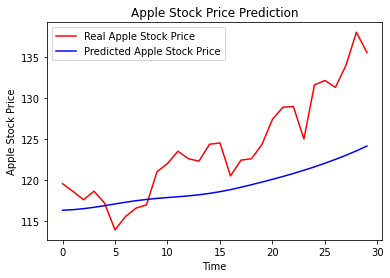

In [25]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
x_data = predicted_stock_price[60:60+len(predicted_stock_price)]
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()